
## Task 5. Graphics

## Introduction

Fine particulate matter (PM2.5) is an ambient air pollutant for which there is strong evidence that it is harmful to human health. In the United States, the Environmental Protection Agency (EPA) is tasked with setting national ambient air quality standards for fine PM and for tracking the emissions of this pollutant into the atmosphere. Approximatly every 3 years, the EPA releases its database on emissions of PM2.5. This database is known as the National Emissions Inventory (NEI). You can read more information about the NEI at the EPA National Emissions Inventory web site.

For each year and for each type of PM source, the NEI records how many tons of PM2.5 were emitted from that source over the course of the entire year. The data that you will use for this assignment are for 1999, 2002, 2005, and 2008.

### Data

**PM2.5 Emissions Data** (`summarySCC_PM25.rds`): This file contains a data frame with all of the PM2.5 emissions data for 1999, 2002, 2005, and 2008. For each year, the table contains number of tons of PM2.5 emitted from a specific type of source for the entire year.

- **fips**: A five-digit number (represented as a string) indicating the U.S. county
- **SCC**: The name of the source as indicated by a digit string (see source code classification table)
- **Pollutant**: A string indicating the pollutant
- **Emissions**: Amount of PM2.5 emitted, in tons
- **type**: The type of source (point, non-point, on-road, or non-road)
- **year**: The year of emissions recorded

**Source Classification Code Table** (`Source_Classification_Code.rds`): This table provides a mapping from the SCC digit strings in the Emissions table to the actual name of the PM2.5 source. The sources are categorized in a few different ways from more general to more specific and you may choose to explore whatever categories you think are most useful. For example, source “10100101” is known as “Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal”.


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


### R data preprocess:
``` r
NEI <- readRDS("/Users/arturmarkov/univer/master_degree/software_for_data_processing/data/summarySCC_PM25.rds")
SCC <- readRDS("/Users/arturmarkov/univer/master_degree/software_for_data_processing/data/Source_Classification_Code.rds")

write.csv(NEI, "/Users/arturmarkov/univer/master_degree/software_for_data_processing/data/summarySCC_PM25.csv", row.names=FALSE)
write.csv(SCC, "/Users/arturmarkov/univer/master_degree/software_for_data_processing/data/Source_Classification_Code.csv", row.names=FALSE)

```


### Note: `.show("svg")` used only for layout in github. To unlock interactivity -- delete this line.

In [2]:
nei = pd.read_csv('/Users/arturmarkov/univer/master_degree/software_for_data_processing/L5/summarySCC_PM25.csv', low_memory=False)
scc = pd.read_csv('/Users/arturmarkov/univer/master_degree/software_for_data_processing/L5/Source_Classification_Code.csv', low_memory=False)


### Questions

You must address the following questions and tasks in your exploratory analysis. For each question/task you will need to make a single **bar** plot. You can use any plotting system in R to make your plot.


1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Make a plot showing the **total** PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

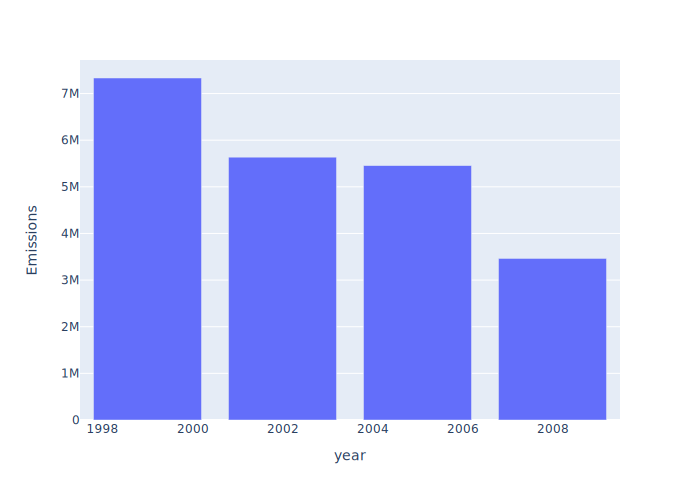

In [3]:
px.bar(nei.groupby(['year'],as_index=False).Emissions.sum(), x='year', y='Emissions').show("svg")


Answer: `yes`

2. Have total emissions from PM2.5 decreased in the **Baltimore City**, Maryland (`fips == "24510"`) from 1999 to 2008?

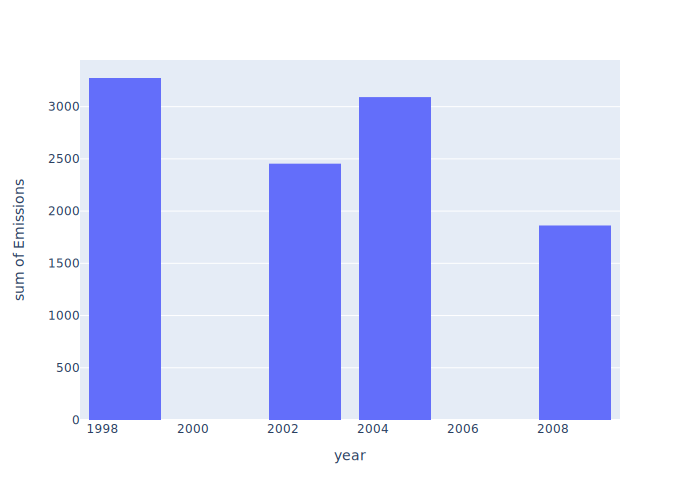

In [4]:
fig = px.histogram(nei[nei.fips=='24510'].groupby(['year'],as_index=False).Emissions.sum(), x='year', y='Emissions', nbins=5).update_layout(bargap=0.2)
fig.show("svg")

Answer: `yes`

3. Of the four types of sources indicated by the `type` (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for **Baltimore City**? Which have seen increases in emissions from 1999–2008?


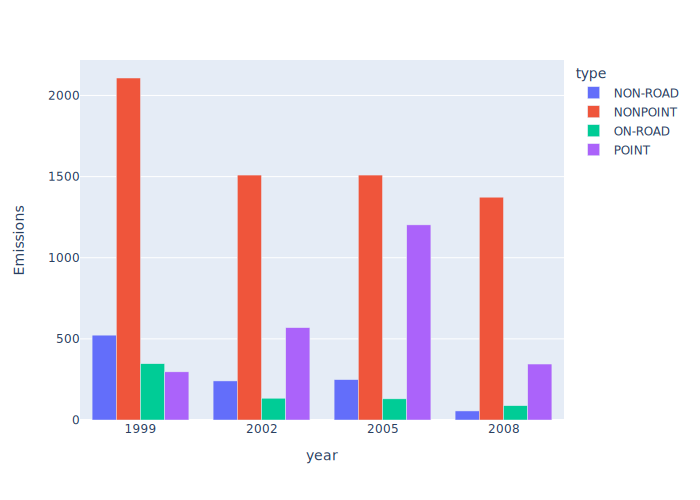

In [5]:
fig = px.bar(nei[nei.fips=='24510'].groupby(['year', 'type'],as_index=False).Emissions.sum(), x='year', y='Emissions',color='type').update_layout(barmode='group')
fig.show("svg")

Answer:
- `NON-ROAD` decreased
- `ON-ROAD`  decreased
    

4. Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?

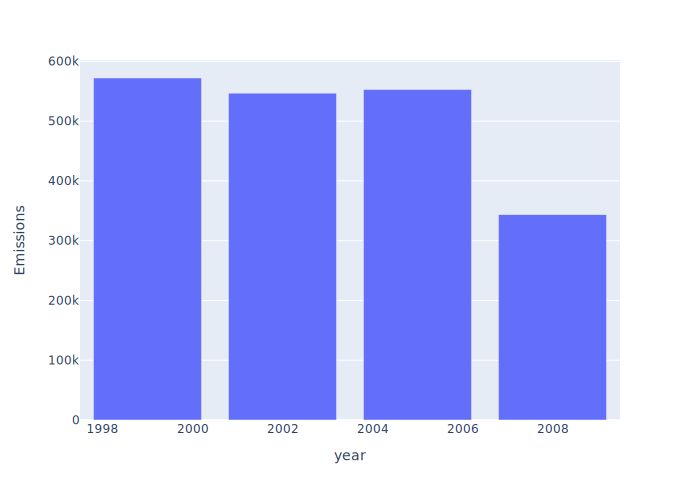

In [6]:
fig = px.bar(nei[nei.SCC.isin(scc[scc['EI.Sector'].fillna('').str.lower().str.contains('coal')].SCC.unique())].groupby(['year'], as_index=False).Emissions.sum(), x='year', y='Emissions')
# fig
fig.show("svg")

Answer: `decreased`

5. How have emissions from motor vehicle sources changed from 1999–2008 in **Baltimore City** (EI.Sector starts from "Mobile")?


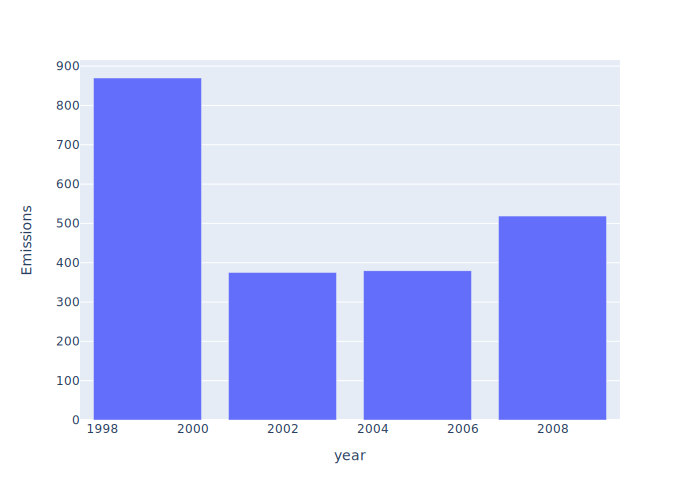

In [7]:
mask =  (nei.SCC.isin(scc[scc['EI.Sector'].str.lower().str.contains('mobile')].SCC.unique())) & (nei.fips=='24510')
fig = px.bar(nei[mask].groupby(['year'], as_index=False).Emissions.sum(),x='year', y='Emissions')
# fig
fig.show("svg")

Answer: `slightly incrased`

6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in **Los Angeles County**, California (`fips == "06037"`). Which city has seen greater changes over time in motor vehicle emissions?





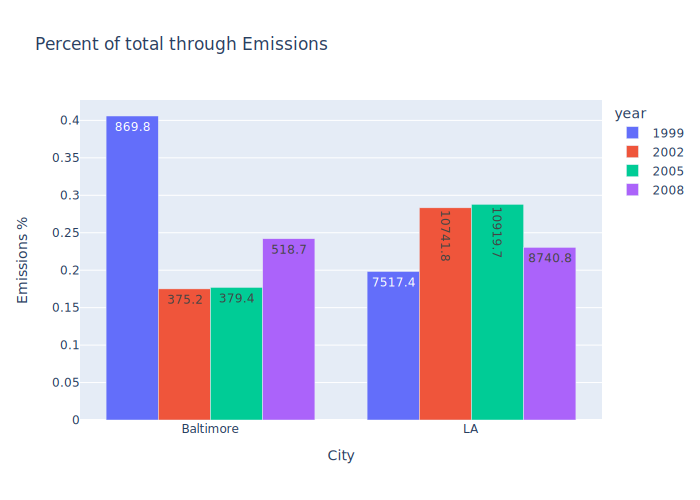

In [8]:
motor = (nei.SCC.isin(scc[scc['EI.Sector'].str.lower().str.contains('mobile')].SCC.unique())) 

t6 = nei[ (motor) & (nei.fips.isin(['24510', '06037']))]
d = {
    '24510':'Baltimore',
    '06037':'LA'
}
t6['city'] = t6.fips.apply(lambda x: d[x])

tt = ((t6.groupby(['city','year']
).Emissions.sum()/ t6.groupby(['city']
).Emissions.sum()).reset_index())

tt = tt.rename(columns={"Emissions":'Emissions %'})\
    .merge(
            t6.groupby(['city','year'], as_index=False).Emissions.sum().round(1), 
        how='inner',
        on=['city','year']
)
tt.year = tt.year.astype(str)

fig = px.bar(
    tt,
    x='city', y='Emissions %',
    color='year', text='Emissions', barmode='group',
    title='Percent of total through Emissions',
    labels={'city': 'City', 'Emissions':'% of total Emissions'})
# fig
fig.show("svg")


Answer:
- Baltimore: `increased comparing to 2002-2005`
- LA: `decreased compating to 2002-2005`